<a href="https://colab.research.google.com/github/dsgustavomoreira/Classifica-o-Imagens-Roupas-com-RNConvolucionais/blob/main/Classifica%C3%A7%C3%A3o_de_Imagens_de_Roupas_com_RN_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Roupas

# Etapa 1: Importação das bibliotecas

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Etapa 2: Carregamento da base de dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fashion_train_df = pd.read_csv('/content/drive/MyDrive/DS Gustavo Moreira/IA EXPERT/Arquivos/fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('/content/drive/MyDrive/DS Gustavo Moreira/IA EXPERT/Arquivos/fashion-mnist-test.csv', sep = ',')

# Etapa 3: Visualização dos dados

In [4]:
fashion_train_df.shape

(60000, 785)

In [5]:
fashion_test_df.shape

(10000, 785)

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [8]:
# Transformando os valores em float, pois iremos trabalhar com a normalização e o seu resultado conterá valores 'ponto flutuantes'
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

In [9]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
training.shape

(60000, 785)

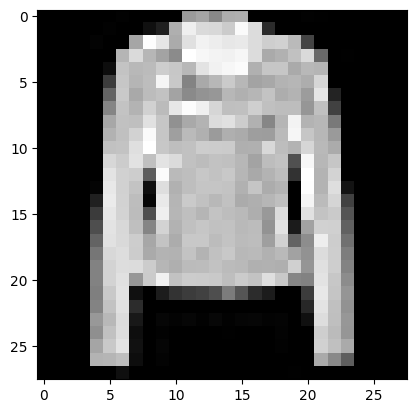

In [11]:
i = random.randint(1, 60000)
plt.imshow(training[i,1:].reshape((28,28)))
plt.imshow(training[i,1:].reshape((28,28)), cmap='gray')

0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

In [12]:
# Identificar a qual classe a imagem pertence
label = training[i,0]
label

4.0

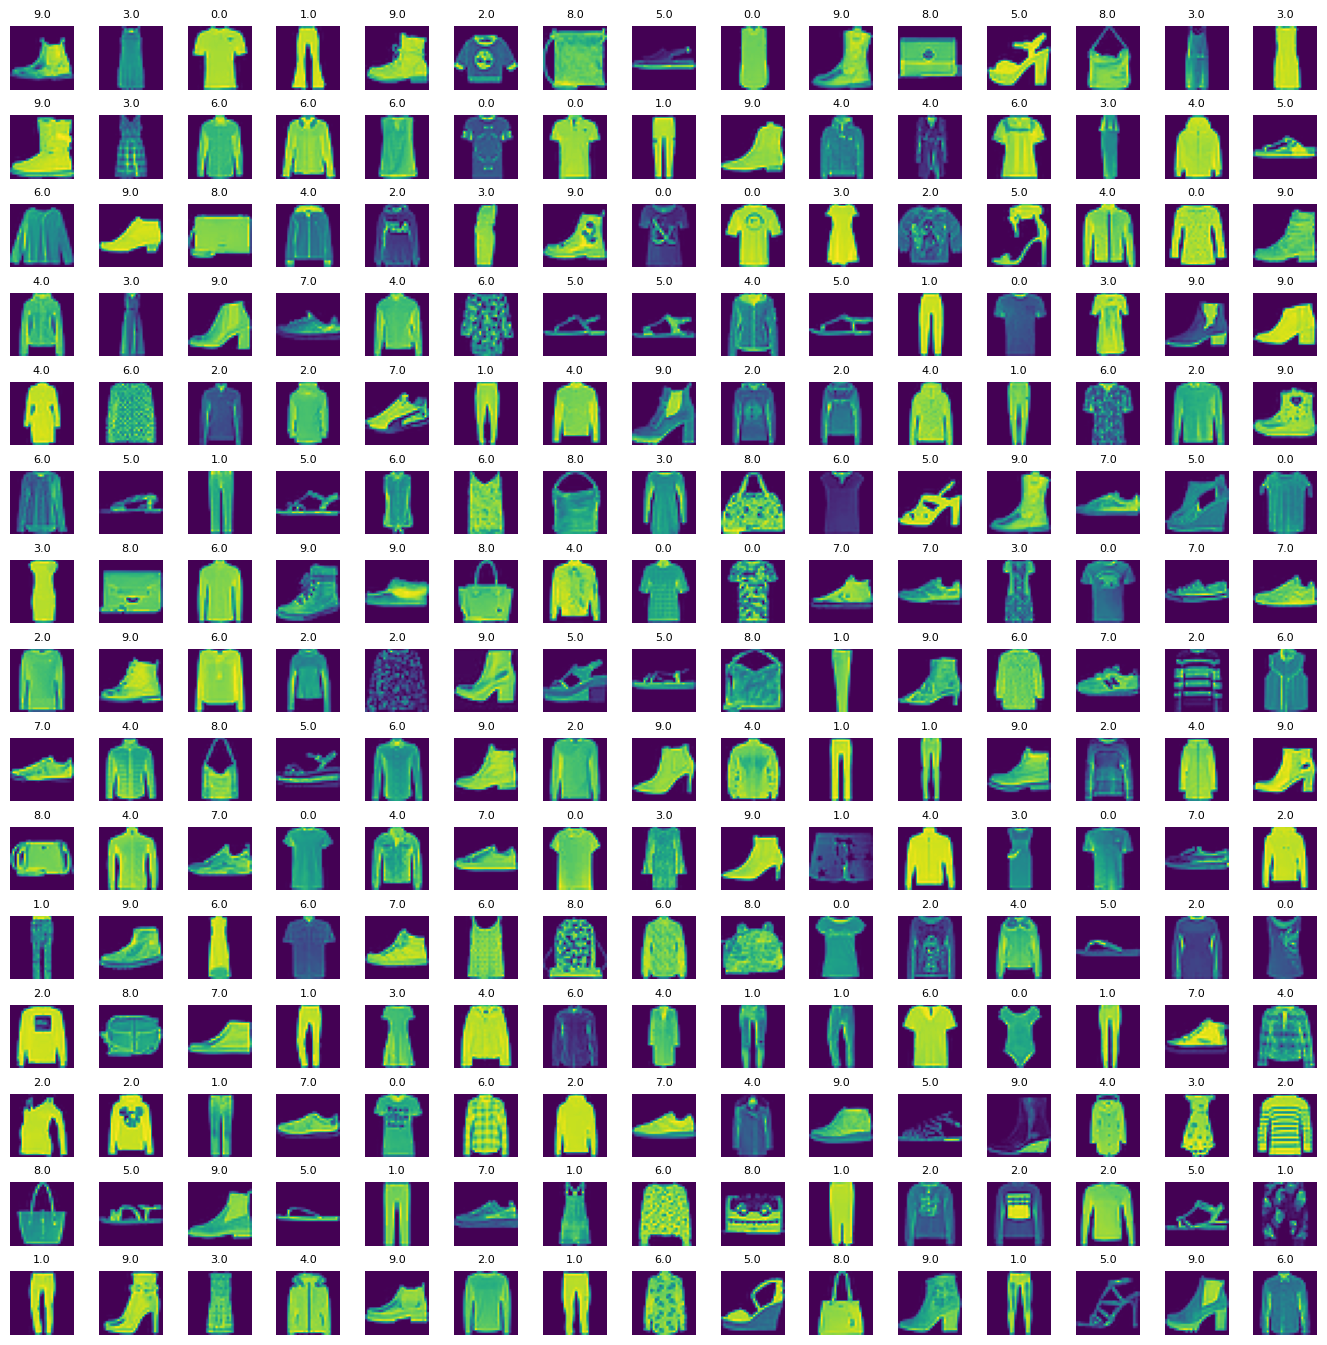

In [13]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index,1:].reshape((28,28)))
  axes[i].set_title(training[index,0], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Etapa 4: Tratamento da base de dados

In [14]:
# Dividindo os valaores dos pixels por 255 (valor máximo), para deixar na escala entre '0' e '1', pois a RN funciona melhor assim
X_train = training[: , 1:] / 255
y_train = training[: , :1]

In [15]:
X_train.shape

(60000, 784)

In [16]:
y_train.shape

(60000, 1)

In [17]:
X_test = testing[: , 1:]
y_test = testing[: , 0]

In [18]:
X_test.shape

(10000, 784)

In [19]:
y_test.shape

(10000,)

In [20]:
# Verificando se os valores da primeira imagem estão no intervalo entre '0' e '1', conforme código acima
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
# Transformar as imagens no formato de batch para passar ao tensorflow, pois é uma RN Convolucional = primeira linha
# É necessário ter também o número de canais (neste caso 1 canal, pois escala de cinza. Colorida seria 3 canais)

X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))

In [22]:
# batch > altura > largura > 1 canal
X_train.shape

(60000, 28, 28, 1)

In [23]:
# batch > altura > largura > 1 canal
X_test.shape

(10000, 28, 28, 1)

# Etapa 5: Construção e treinamento do modelo

In [24]:
from tensorflow.keras import layers, models
cnn = models.Sequential()


cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))
cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [25]:
# Usando sparse não é necessário fazer a transformação dos dados usando o OneHotEncoder
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam',
            metrics = ['accuracy'])

In [26]:
epochs = 5
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/5
118/118 [==============================] - 55s 446ms/step - loss: 0.8604 - accuracy: 0.6945
Epoch 2/5
118/118 [==============================] - 62s 521ms/step - loss: 0.5077 - accuracy: 0.8141
Epoch 3/5
118/118 [==============================] - 59s 502ms/step - loss: 0.4315 - accuracy: 0.8460
Epoch 4/5
118/118 [==============================] - 70s 588ms/step - loss: 0.3899 - accuracy: 0.8603
Epoch 5/5
118/118 [==============================] - 80s 680ms/step - loss: 0.3621 - accuracy: 0.8698


# Etapa 6: Avaliação do modelo

In [28]:
evaluation = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 56.9173 - accuracy: 0.8044


In [29]:
# loss - accuracy
evaluation

[56.91725158691406, 0.8044000267982483]

In [31]:
predict_x=cnn.predict(X_test)
predicted_classes=np.argmax(predict_x,axis=1)

313/313 [==============================] - 3s 8ms/step


In [32]:
predicted_classes

array([0, 1, 6, ..., 8, 8, 4])

In [33]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

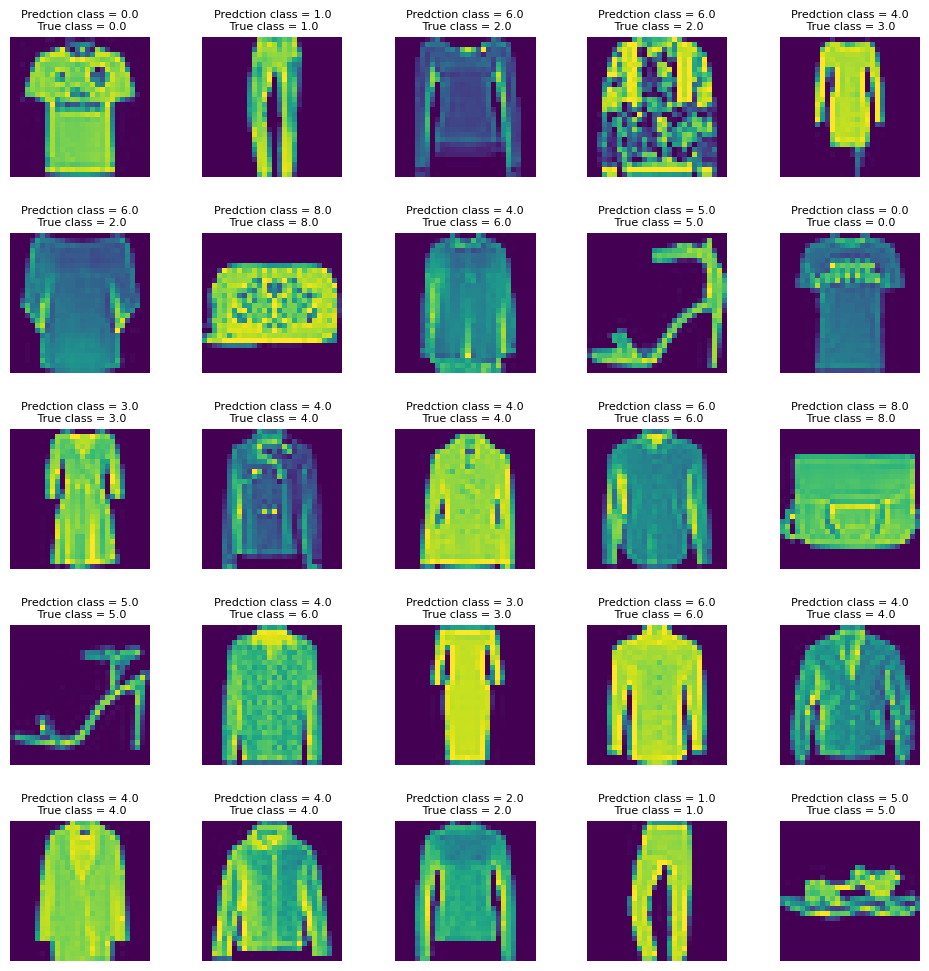

In [34]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
  axes[i].imshow(X_test[i].reshape((28,28)))
  axes[i].set_title("Predction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

<Axes: >

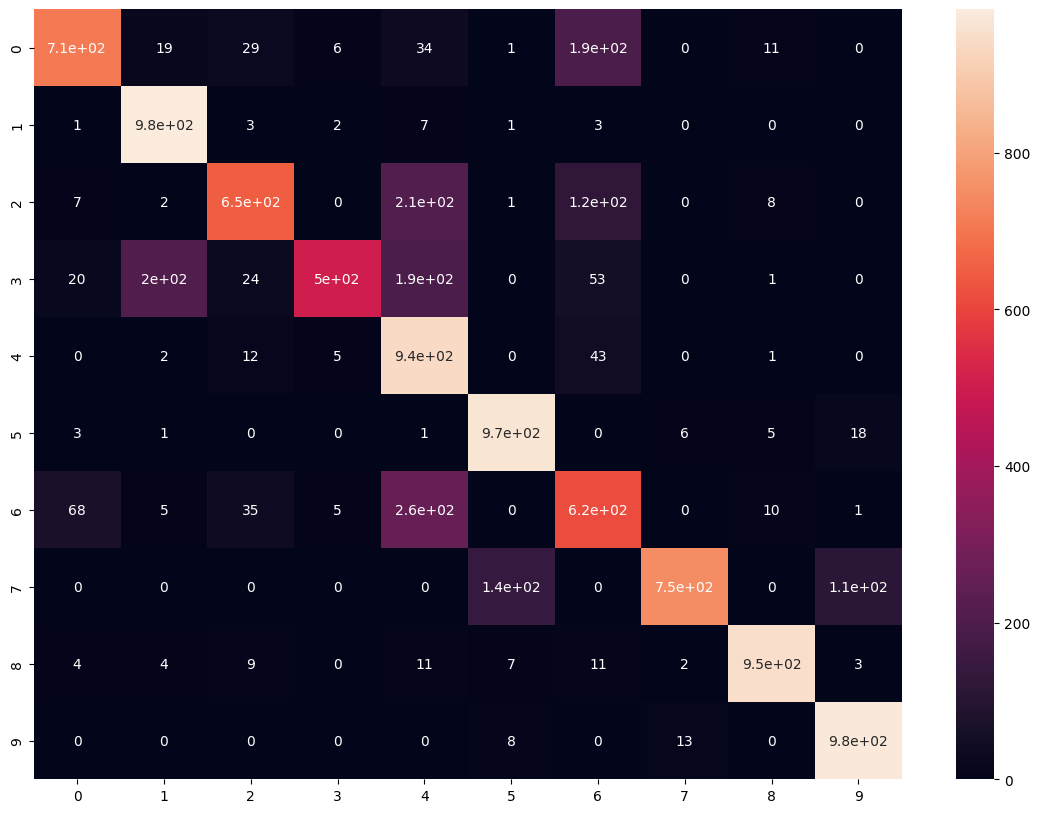

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [37]:
cm

array([[708,  19,  29,   6,  34,   1, 192,   0,  11,   0],
       [  1, 983,   3,   2,   7,   1,   3,   0,   0,   0],
       [  7,   2, 650,   0, 209,   1, 123,   0,   8,   0],
       [ 20, 204,  24, 505, 193,   0,  53,   0,   1,   0],
       [  0,   2,  12,   5, 937,   0,  43,   0,   1,   0],
       [  3,   1,   0,   0,   1, 966,   0,   6,   5,  18],
       [ 68,   5,  35,   5, 259,   0, 617,   0,  10,   1],
       [  0,   0,   0,   0,   0, 140,   0, 750,   0, 110],
       [  4,   4,   9,   0,  11,   7,  11,   2, 949,   3],
       [  0,   0,   0,   0,   0,   8,   0,  13,   0, 979]])

In [39]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]
target_names

['Class 0',
 'Class 1',
 'Class 2',
 'Class 3',
 'Class 4',
 'Class 5',
 'Class 6',
 'Class 7',
 'Class 8',
 'Class 9']

In [40]:
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.71      0.78      1000
     Class 1       0.81      0.98      0.89      1000
     Class 2       0.85      0.65      0.74      1000
     Class 3       0.97      0.51      0.66      1000
     Class 4       0.57      0.94      0.71      1000
     Class 5       0.86      0.97      0.91      1000
     Class 6       0.59      0.62      0.60      1000
     Class 7       0.97      0.75      0.85      1000
     Class 8       0.96      0.95      0.96      1000
     Class 9       0.88      0.98      0.93      1000

    accuracy                           0.80     10000
   macro avg       0.83      0.80      0.80     10000
weighted avg       0.83      0.80      0.80     10000

